### **CUSTOMER CHURN CLASSIFICATION**

 #### This project is based on a dataset from SyriaTel. It aims at classifying a customer as either 'soon to churn' or 'not soon to churn'.
 * Authored by **Lynne Mutwiri**, pursuing a Data Science bootcamp  on full-time student pace.

![Graph](Img_One.png)

### Problem Statement:

* The goal of this project is to develop a binary classification model to predict whether a customer will "soon" stop doing business with SyriaTel, a telecommunications company. 
* By identifying predictable patterns and indicators, the model aims to assist the telecom business in reducing financial losses associated with customers who have a high likelihood of churn. The target audience for this solution is SyriaTel itself, as they are interested in optimizing customer retention strategies to minimize revenue attrition.
* The problem can be framed as a binary classification task, where the model will be trained on historical customer data to predict whether a customer is likely to churn or not. The classifier will be trained using various features and historical customer behavior.

In [289]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.utils import compute_class_weight
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, plot_confusion_matrix
import xgboost as xgb

In [290]:
data = pd.read_csv('SyriaTelChurn Dataset.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Data Cleaning

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

A quick look at the data information reveals:
* There are no missing values.
* There are 4 categorical features(***state, phone number, international plan, voicemail plan***).

Below is a further analysis of the missing values using OOP.

#### OOP

Create class objects and instances in ```OOP``` for various task performances.

```OOP``` will also help in reproducability and collaboration.

In [292]:
# instantiate a class to inspect and perform various operations on the data
class DataChecker:
    def __init__(self, data):
        self.data = data
    #define a function to check for duplicates
    def has_duplicates(self):
        return self.data.duplicated().any()
    #define a function to check for missing values
    def missing_values(self):
        return self.data.isna().any()
    #define a function to drop unnecessary columns
    def drop_columns(self, columns):
        return self.data.drop(columns, axis =1, inplace = True)
    
data_checker = DataChecker(data)


Check for duplicated rows and missing values.

In [293]:
# check for duplicated rows
is_duplicate = data_checker.has_duplicates()

#check for missing values
is_null = data_checker.missing_values()
print('Duplicated rows:',is_duplicate)
print()
print(is_null)

Duplicated rows: False

state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool


There are no duplicates and no missing values in data.

Next, drop phone number since it is a unique identifier that is not relevant in predicting churn.

In [294]:
data_checker.drop_columns('phone number')

### EDA

#### Analyzing the target variable 

Examine the distribution of the target variable, ```Churn```.

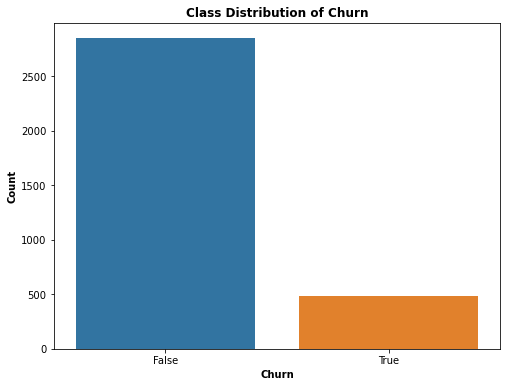

False    2850
True      483
Name: churn, dtype: int64


In [295]:
class_distr = data['churn'].value_counts()

#plot the distribution

plt.figure(figsize=(8,6))
sns.countplot(x = 'churn', data = data)
plt.xlabel('Churn', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.title('Class Distribution of Churn', fontweight = 'bold')
plt.show()

#print the class distribution
print(class_distr)

##### Analyzing numerical features

Explore statistical summary of the data and plot histograms and boxplots to understand the distribution.

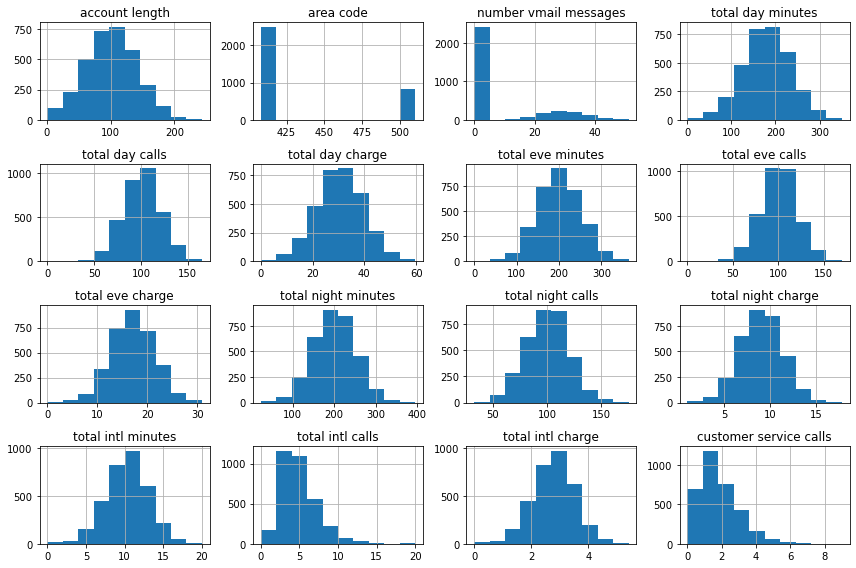

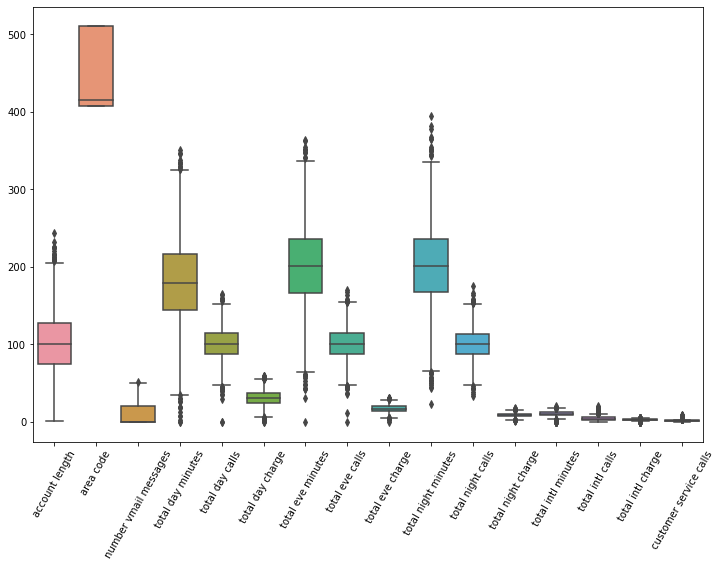

In [296]:
# Select the numerical features 
num_features = ['account length', 'area code', 'number vmail messages', 'total day minutes',
                      'total day calls', 'total day charge', 'total eve minutes', 'total eve calls','total eve charge', 'total night minutes',
                      'total night calls','total night charge', 'total intl minutes', 'total intl calls','total intl charge', 'customer service calls']


# Plot histograms for the numerical features
data[num_features].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot box plots for the numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[num_features])
plt.xticks(rotation=60)
plt.show()


##### Analyzing categorical features

Next, the categorical features are analyzed to see their distribution.

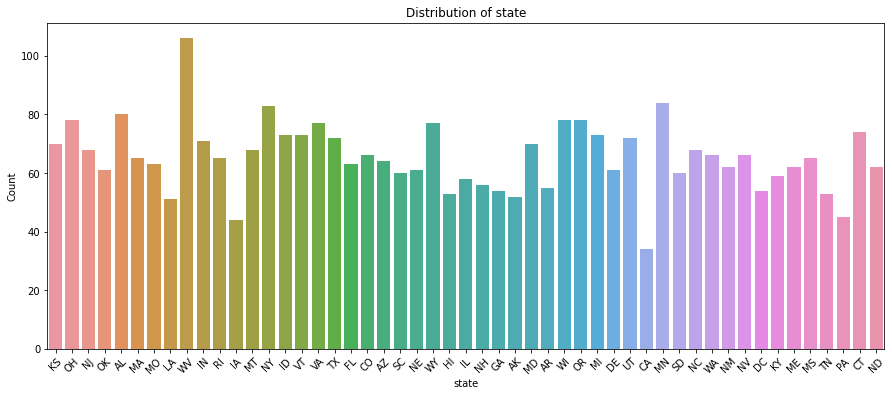

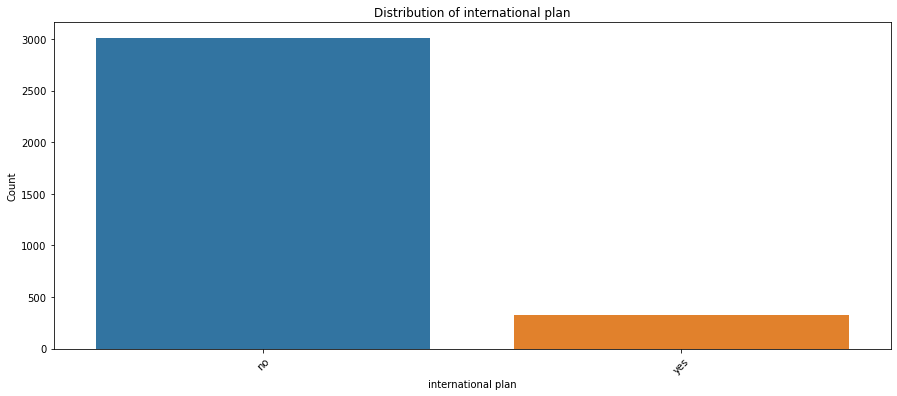

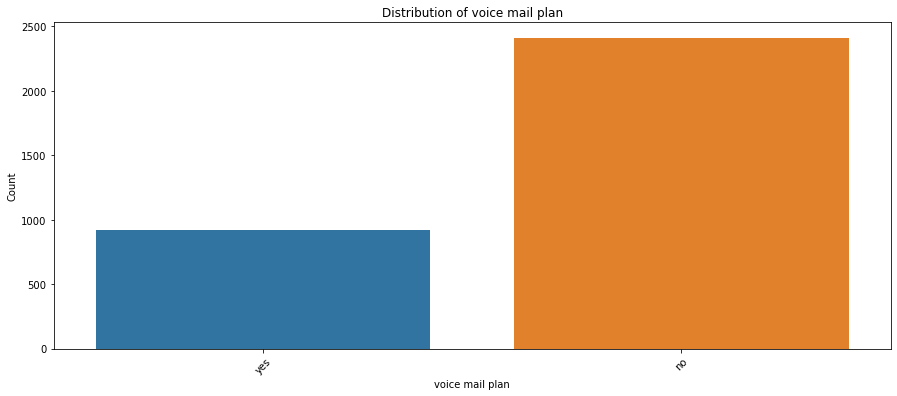

In [297]:
# Select the categorical features
categorical_features = ['state', 'international plan', 'voice mail plan']

# Plot bar chart or count plot
for feature in categorical_features:
    
    plt.figure(figsize=(15, 6))
    sns.countplot(x=feature, data=data)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


Identify correlations.

In [298]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


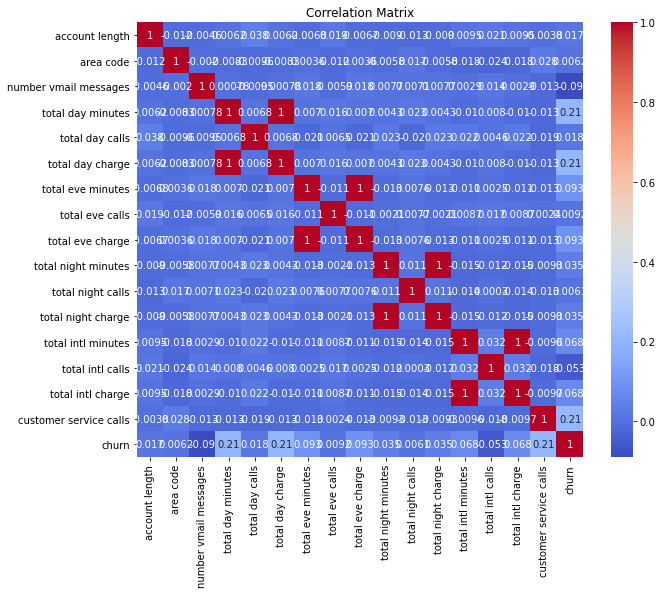

In [299]:
#Plot the correlation matrix to identify potential relationships and dependencies.
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix, it is very evident that:
* There is extremely high correlation between the minutes and their corresponding charges. 
* Keeping both variables in the analysis would be redundant and may introduce problems such as overfitting in the predictive model(s).
* Dropping either will not result in a loss of information, as they provide the same information.
* There are no linear relationships between the rest of the variables.

In [300]:
#dropping the redundant features(minutes)
red_features = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
numerical_features = [var for var in  num_features if var not in red_features]
data.drop(red_features, axis = 1, inplace= True)

print(numerical_features)

['account length', 'area code', 'number vmail messages', 'total day calls', 'total day charge', 'total eve calls', 'total eve charge', 'total night calls', 'total night charge', 'total intl calls', 'total intl charge', 'customer service calls']


Explore churn patterns by comparing the distributions and statistics of numerical features between customers who churned and those who did not.

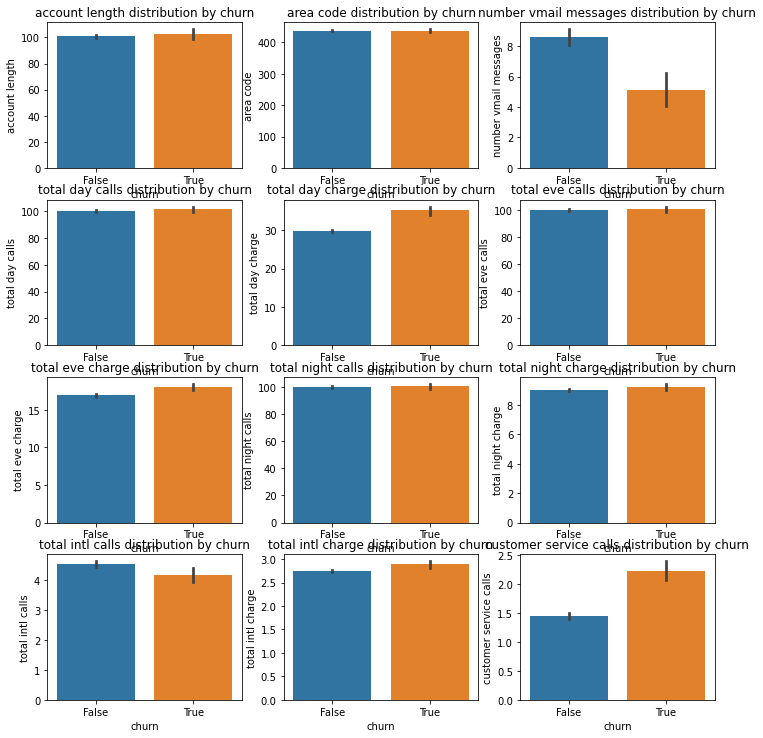

In [301]:
# Create subplots for each feature
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
fig.tight_layout()

# Plot the graphs
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.barplot(data=data, x='churn', y=feature, ax=ax)

    ax.set_ylabel(feature)
    ax.set_title(f'{feature} distribution by churn')
 
plt.show()

**Total day charge** and **customer service calls** stand out as the main features impacting churn.

#### Preprocessing

Converting  categorical variables to numerical variables and defining the target and predictor variables.

In [302]:
data = pd.DataFrame(data)

# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_features)
data['churn'] = data['churn'].astype(int)

# Separate X and y
X = data.drop('churn', axis=1)  # Features
y = data['churn']  # Target variable

data.head()


,account length,area code,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,25,110,45.07,99,16.78,91,11.01,3,...,0,0,0,0,0,0,1,0,0,1
1,107,415,26,123,27.47,103,16.62,103,11.45,3,...,0,0,0,0,0,0,1,0,0,1
2,137,415,0,114,41.38,110,10.30,104,7.32,5,...,0,0,0,0,0,0,1,0,1,0
3,84,408,0,71,50.90,88,5.26,89,8.86,7,...,0,0,0,0,0,0,0,1,1,0
4,75,415,0,113,28.34,122,12.61,121,8.41,3,...,0,0,0,0,0,0,0,1,1,0


With ```0 ```= ```false```  and ```1``` = ```true``` for churn, check the distribution of the predictor variable.

In [303]:
#checking distribution of target variable
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

Treat imbalance in the target variable by resampling(oversampling)

In [304]:
# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

Split the data into train and test

In [305]:
# Split the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [306]:
#confirm the distribution of the balanced data
y_train.value_counts()

1    2295
0    2265
Name: churn, dtype: int64

The data is now balanced and ready for scaling and modeling.

Standard scale the data

In [307]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

#### Model Evaluation

```Accuracy``` score was used since it is best used for classification problems where the aim is to find the correct predictions.

The score quantifies the proportion of correct predictions(churn and not churn) made by the model out of the total number of predictions(false positives and false negatives).

Another metric, the ```AUC``` was also considered to help visualize the outcome of the models.

It assesses and compares the performance of binary classification models, providing an overall measure of the model's ability to separate the positive and negative classes.

* Using Accuracy score and the AUC metrics, check the performance of the model on both the training and testing sets.

### 1. Logistic Regression

Fitting and transforming the logistic regression model:

In [308]:
# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Fit the logistic regression model to the scaled training data
logreg.fit(X_train, y_train)

# Predict on the scaled testing data
y_pred = logreg.predict(X_test)


Evaluating the logistic regression model's performance on both train and test data sets:

In [309]:
# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, logreg.predict(X_train))
train_auc = roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])

# Evaluate the model's performance on the testing data
test_accuracy = accuracy_score(y_test, y_pred)
test_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Print the evaluation results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training AUC:", train_auc)
print("Testing AUC:", test_auc)

Training Accuracy: 0.9203947368421053
Testing Accuracy: 0.9236842105263158
Training AUC: 0.9708226444858052
Testing AUC: 0.9725725725725727


* The model has an accuray of ```92%``` on both the training and testing sets.
* This means there is neither ```underfitting``` nor ```overfitting``` of data during training, producing a ```very good model``` that can perform equally well on an unseen dataset.

Confusion matrix of the logistic regression  model:

Confusion Matrix:
[[562  23]
 [ 64 491]]


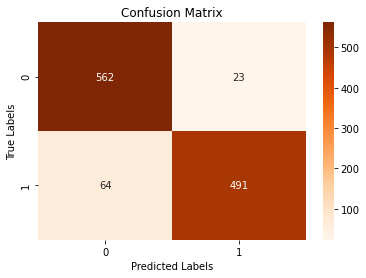

In [310]:
# Get confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Plot confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, cmap= 'Oranges', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

* From the test data of **1140** customers, the model made ```1053```(562+491) correct predictions.
* This represents 92.3% of the total test customers.
* Customers who were predicted to churn but didn't churn were **23**.
* Customers who were predicted to not churn yet churned were **64**. 

Getting the AUC of the regression model:

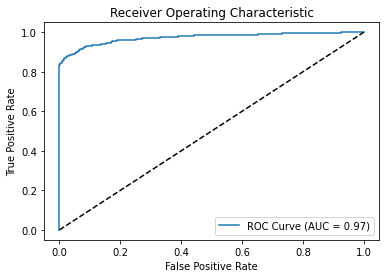

In [311]:
# Get predicted probabilities for positive class
y_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


* An AUC-ROC score of 97% is very high, indicating a better predictive performance of the model.

### 2. Decision Trees

Fitting the decision tree model:

In [312]:
# Train a Decision Tree Classifier:

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = logreg.predict(X_train)

# Make predictions on the test data:
y_pred = tree.predict(X_test)

# Calculate the predicted probabilities for the positive class:
y_prob = tree.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


Decision Trees model evaluation:

0.922028182028182


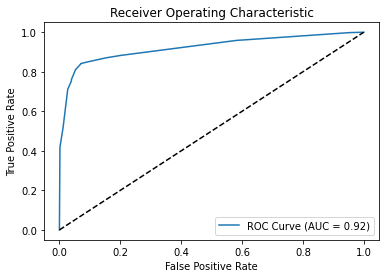

In [313]:
# Calculate the AUC score:
auc = roc_auc_score(y_test, y_prob)
print(auc)

#Plot the ROC curve:
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

* An AUC score of ```92%``` is high, indicating that the model has very good ability to distinguish between actual positive and negative instances.

Further evaluate the model.

In [314]:
# Calculate accuracy score on the training data
train_dtree_accuracy = accuracy_score(y_train, y_pred_train)

# Calculate confusion matrix on the training data
train_confusion_mat = confusion_matrix(y_train, y_pred_train)

# Print evaluation metrics and confusion matrix for the training data
print("Training Accuracy:", train_dtree_accuracy)
print("Training Confusion Matrix:")
print(train_confusion_mat)

# Calculate accuracy score on the test set
test_dtree_accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
test_confusion_mat = confusion_matrix(y_test, y_pred)

# Print evaluation metrics and confusion matrix
print("Test Accuracy:", test_dtree_accuracy)
print("Test Confusion Matrix:")
print(test_confusion_mat)

Training Accuracy: 0.9203947368421053
Training Confusion Matrix:
[[2200   65]
 [ 298 1997]]
Test Accuracy: 0.8859649122807017
Test Confusion Matrix:
[[544  41]
 [ 89 466]]


* ```Accuracy score``` on the training set is ```92%```, slightly higher than that of the testing data, ```88.5%```.
* This is not very bad performance but could indicate chances of overfitting and therefore poor performance on unseen data.
* The score is also lower than that of the base model, the Logistic Regression model.

Next, plot the confusion matrix.

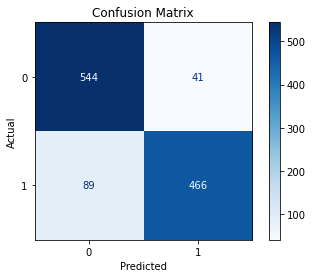

In [315]:
# Plot confusion matrix
disp = plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Customers who were predicted to not churn yet churned were **41**. 
* Customers who were predicted to churn but didn't churn were **89**.

#### Hyperparameter Tuning for Decision Tree Model

Perform a hyperparamter tuning to maximize the model's performance.

Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 5}
AUC score: 0.9354030954030953


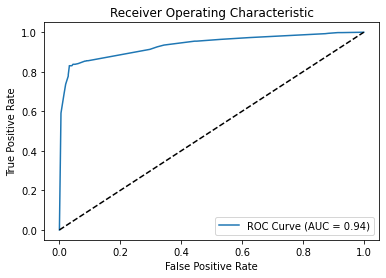

In [316]:
# Create a decision tree classifier
tree = DecisionTreeClassifier()

# Define the hyperparameters to tune and their possible values
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Create GridSearchCV instance with the decision tree classifier and parameter grid
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best trained model from the GridSearchCV instance
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Calculate the predicted probabilities for the positive class
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)
print("AUC score:", auc)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

* Tuning the model parameters produces better parameters that **improve the perfromance** of the model from an AUC of ```92%``` to an AUC of ```94%```.

### Random Forest

Fit a predictor model and inspect the metrics.

Plot the confusion matrix and ROC curve.

Training Accuracy: 1.0
Test Accuracy: 0.9429824561403509
Confusion Matrix:
[[553  32]
 [ 33 522]]


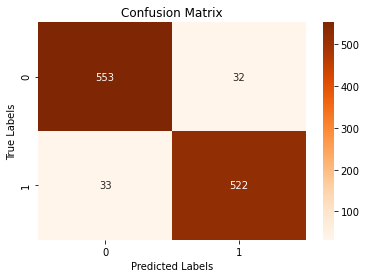

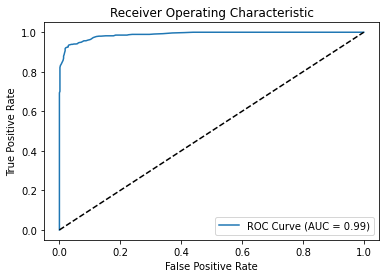

In [317]:
# Create an instance of RandomForestClassifier
forest = RandomForestClassifier()

# Fit the Random Forest model to the training data
forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = forest.predict(X_test)

# Evaluate the model's performance
# Calculate accuracy on the training set
train_randf_accuracy = forest.score(X_train, y_train)
print("Training Accuracy:", train_randf_accuracy)

# Calculate accuracy on the test set
test_randf_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_randf_accuracy)

# Get confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Plot confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Get predicted probabilities for positive class
y_prob = forest.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

* An accuracy of ```100%``` accompanied by an AUC score of ```99%``` indicates that the model is overfitting and may not perform well on new, unseen data.
* Additionally, there is a significant difference between the training accuracy and the testing accuracy, which, compared to the Logistic model, makes this model substandard.

Inspect the importance of the features used in creating the model, and their contribution to the prediction.

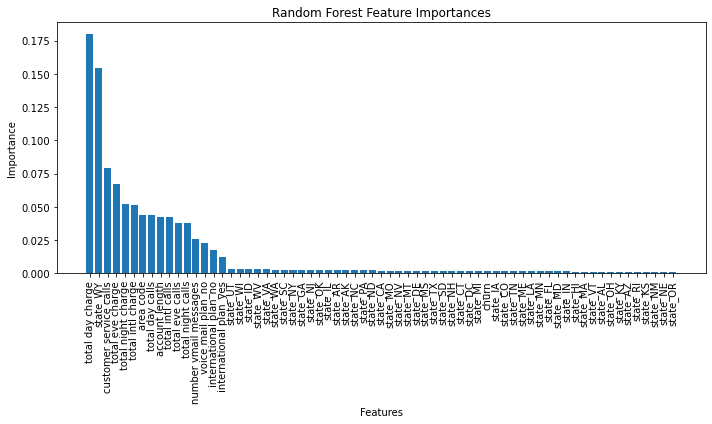

In [318]:
# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), np.array(data.columns)[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

Get the top 12 most important features.

In [319]:
# Get the top 12 important features
top_features = np.array(data.columns)[indices[:12]]

# Convert the indices to integer array
top_indices = np.arange(X_train.shape[1])[indices[:12]]

# Select the top 12 features from the training and testing data
X_train_top = X_train[:, top_indices]
X_test_top = X_test[:, top_indices]

# Create a Random Forest classifier and fit it on the top features
rf_top = RandomForestClassifier()
rf_top.fit(X_train_top, y_train)


RandomForestClassifier()

Inspecting metrics of the top 12 most important features.

In [320]:
# Make predictions on the test data using the model with top features
y_pred_top = rf_top.predict(X_test_top)

# Calculate accuracy
accuracy_top = accuracy_score(y_test, y_pred_top)
print("Accuracy (Top Features):", accuracy_top)

# Get confusion matrix
confusion_top = confusion_matrix(y_test, y_pred_top)
print("Confusion Matrix (Top Features):")
print(confusion_top)


Accuracy (Top Features): 0.9210526315789473
Confusion Matrix (Top Features):
[[532  53]
 [ 37 518]]


A plot of the AUC of the top 12 most important features

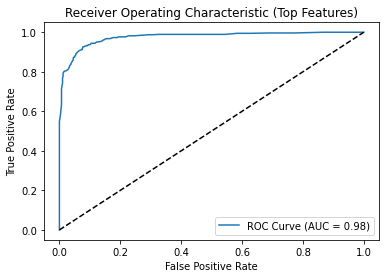

In [321]:
# Get predicted probabilities for positive class
y_prob_top = rf_top.predict_proba(X_test_top)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr_top, tpr_top, thresholds_top = roc_curve(y_test, y_prob_top)

# Calculate AUC score
auc_top = roc_auc_score(y_test, y_prob_top)

# Plot ROC curve
plt.plot(fpr_top, tpr_top, label='ROC Curve (AUC = {:.2f})'.format(auc_top))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Top Features)')
plt.legend(loc='lower right')
plt.show()


#### Ensemble Modeling
Ensemble modeling helps to reduce overfitting, increase model stability, and improve generalization performance. It leverages the strengths of different models to capture different aspects of the data and improve prediction accuracy.

**XGBoost**

* Boosting methods sequentially train multiple weak models (models that perform slightly better than random guessing) and combine their predictions.
* They assign higher weights to misclassified samples, focusing on the difficult cases and improving the overall performance.

Train Accuracy: 0.9203947368421053
Train Confusion Matrix:
[[2200   65]
 [ 298 1997]]
Test Accuracy: 0.9429824561403509
Test Confusion Matrix:
[[553  32]
 [ 33 522]]


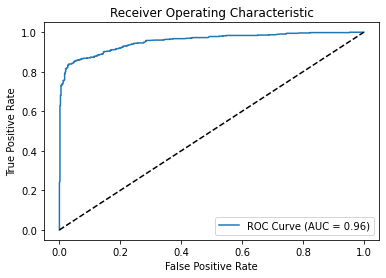

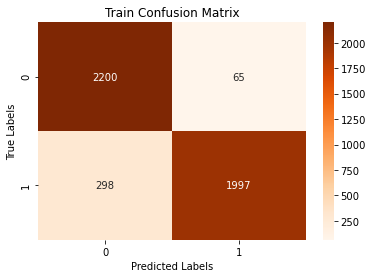

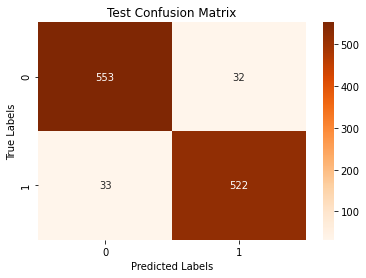

In [322]:
# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the train data
y_pred_xgb_train = model.predict(dtrain)
y_pred_xgb_train_labels = (y_pred_train >= 0.5).astype(int)

# Evaluate the model's performance on the train data
accuracy_xgb_train = accuracy_score(y_train, y_pred_xgb_train_labels)
confusion_xgb_train = confusion_matrix(y_train, y_pred_xgb_train_labels)

# Make predictions on the test data
y_pred_xgb_test = model.predict(dtest)
y_pred_xgb_test_labels = (y_pred >= 0.5).astype(int)

# Evaluate the model's performance
accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb_test_labels)
confusion_xgb_test = confusion_matrix(y_test, y_pred_xgb_test_labels)

# Print the evaluation metrics for train data
print("Train Accuracy:", accuracy_xgb_train)
print("Train Confusion Matrix:")
print(confusion_xgb_train)

# Print the evaluation metrics for the test data
print("Test Accuracy:", accuracy_xgb_test)
print("Test Confusion Matrix:")
print(confusion_xgb_test)

# Calculate false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_test)

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_xgb_test)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_xgb_test_labels)

# Plot the train confusion matrix as a heatmap
sns.heatmap(confusion_xgb_train, annot=True, cmap='Oranges', fmt='d')
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot the test confusion matrix as a heatmap
sns.heatmap(confusion_xgb_test, annot=True, cmap='Oranges', fmt='d')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


* The model performs well on both the test data and the training data. However, its performance on the test set is ```94%``` which is way better and ahead of the train data whose performance is at ```92%```.
* This makes the model substandard compared to the Logistic model, which provided a semblance in its performance on both the training and test data.
* An AUC score of ```96%``` is good but lower than that of the **Random forest model**```(99%)``` and the **Logistic Regression model**```(97%)```.

### Conclusion

* Even as SyriaTel seeks to onboard new customers, reducing or preventing customer churn can help reduce marketing costs. It is easier to maintain existing customers than to recruit new ones.
* Since it is now possible to predict churn with over ```92%``` correctness, the stakeholders should invest necessary resources to combat the customer attrition. 